# First section: connect to drive and prepare the environment


In [ ]:
#Connect file to /content/drive, actually you colab folder path is /content/drive/MyDrive/colab
from google.colab import drive
drive.mount('/content/drive')

#Change the current path to our work directory
import os
path = "/content/drive/MyDrive/ColabNotebooks/socialScienceProject"
os.chdir(path)
os.listdir

!nvidia-smi
!pip install ogb
!pip install torch
!pip install dgl==1.1.0 -f https://data.dgl.ai/wheels/repo.html

Mounted at /content/drive
/bin/bash: line 1: nvidia-smi: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

# Second Section: This section is used to output the basic information of this 2 dataset, and sample a samller dataset from the mag with 20w nodes. Can skip this when doing training.

## 2.1 Here we generate basic information of 2 dataset

In [ ]:
from ogb.nodeproppred import DglNodePropPredDataset

mag_dataset = DglNodePropPredDataset(name = "ogbn-mag")
mag_split_idx = mag_dataset.get_idx_split()
mag_train_idx, mag_valid_idx, mag_test_idx = mag_split_idx["train"], mag_split_idx["valid"], mag_split_idx["test"]
mag_graph, mag_label = mag_dataset[0] # graph: dgl graph object, label: torch tensor of shape (num_nodes, num_tasks)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
print(mag_graph)

Graph(num_nodes={'author': 1134649, 'field_of_study': 59965, 'institution': 8740, 'paper': 736389},
      num_edges={('author', 'affiliated_with', 'institution'): 1043998, ('author', 'writes', 'paper'): 7145660, ('paper', 'cites', 'paper'): 5416271, ('paper', 'has_topic', 'field_of_study'): 7505078},
      metagraph=[('author', 'institution', 'affiliated_with'), ('author', 'paper', 'writes'), ('paper', 'paper', 'cites'), ('paper', 'field_of_study', 'has_topic')])


In [ ]:
print(mag_graph)
print(mag_label)

Graph(num_nodes={'author': 1134649, 'field_of_study': 59965, 'institution': 8740, 'paper': 736389},
      num_edges={('author', 'affiliated_with', 'institution'): 1043998, ('author', 'writes', 'paper'): 7145660, ('paper', 'cites', 'paper'): 5416271, ('paper', 'has_topic', 'field_of_study'): 7505078},
      metagraph=[('author', 'institution', 'affiliated_with'), ('author', 'paper', 'writes'), ('paper', 'paper', 'cites'), ('paper', 'field_of_study', 'has_topic')])
{'paper': tensor([[246],
        [131],
        [189],
        ...,
        [266],
        [289],
        [  1]])}


In [ ]:
from ogb.nodeproppred import DglNodePropPredDataset

arxiv_dataset = DglNodePropPredDataset(name = "ogbn-arxiv")
arxiv_split_idx = arxiv_dataset.get_idx_split()
arxiv_train_idx, arxiv_valid_idx, arxiv_test_idx = arxiv_split_idx["train"], arxiv_split_idx["valid"], arxiv_split_idx["test"]
arxiv_graph, arxiv_label = arxiv_dataset[0] # graph: dgl graph object, label: torch tensor of shape (num_nodes, num_tasks)

In [ ]:
print(arxiv_graph)

Graph(num_nodes=169343, num_edges=1166243,
      ndata_schemes={'year': Scheme(shape=(1,), dtype=torch.int64), 'feat': Scheme(shape=(128,), dtype=torch.float32)}
      edata_schemes={})


In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import random

# ------------------------- Utility Functions -------------------------
def plot_degree_distribution(degrees, title, filename, loglog=False):

    degree_counts = Counter(degrees)
    x, y = zip(*degree_counts.items())

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s=20, alpha=0.6)
    plt.title(title, fontsize=14)
    plt.xlabel('Degree' if not loglog else 'Degree (log)')
    plt.ylabel('Frequency' if not loglog else 'Frequency (log)')

    if loglog:
        plt.xscale('log')
        plt.yscale('log')
        plt.grid(True, which="both", ls="--")
    else:
        plt.grid(True)

    plt.savefig(f"{filename}.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


def analyze_network(G, network_name):
    # ----------------- Basic Properties -----------------
    metrics = {
        'num_nodes': G.number_of_nodes(),
        'num_edges': G.number_of_edges(),
        'avg_in_degree': np.mean([d for _, d in G.in_degree()]),
        'avg_out_degree': np.mean([d for _, d in G.out_degree()]),
        'density': nx.density(G)
    }

    # ----------------- Degree Distributions -----------------
    print(G.number_of_nodes())
    print(G.number_of_edges())

    all_degrees = list(dict(G.degree()).values())
    print(all_degrees)

    plot_degree_distribution(all_degrees,
                           f"{network_name} Degree Distribution (Linear)",
                           f"{network_name}_degree_linear")
    plot_degree_distribution(all_degrees,
                           f"{network_name} Degree Distribution (Log-Log)",
                           f"{network_name}_degree_log",
                           loglog=True)


    # ----------------- Giant Component Analysis -----------------
    if nx.is_directed(G):
        scc = max(nx.strongly_connected_components(G), key=len)
        #strongly connected components, means every node can reach other node through the directed link
        #gain the giant component, with all the attributes of the original graph
        G_gc = G.subgraph(scc)
    else:
        gcc = max(nx.connected_components(G), key=len)
        G_gc = G.subgraph(gcc)

    metrics['gc_nodes'] = G_gc.number_of_nodes()
    print(G_gc.number_of_nodes())

    # ----------------- Path Length Distribution -----------------
    path_lengths = []

    sample_size = 50
    sampled_nodes = random.sample(list(G_gc.nodes()), sample_size) #sample 50 nodes to do the analyze

    for node in sampled_nodes:
        lengths = nx.single_source_shortest_path_length(G_gc, node)
        path_lengths.extend(lengths.values())

    plt.figure(figsize=(10,6))
    plt.hist(path_lengths, bins=30)
    plt.title(f"{network_name} Path Length Distribution")
    plt.savefig(f"{network_name}_path_lengths.png", dpi=300)
    plt.show()
    plt.close()

    metrics['avg_path_length'] = np.mean(path_lengths)

    # ----------------- Clustering Analysis -----------------
    sampled_clustering = {}

    # Convert MultiDiGraph to DiGraph
    G_simple = nx.DiGraph(G_gc)
    for node in sampled_nodes:
        sampled_clustering[node] = nx.clustering(G_simple, node)
    clustering = sampled_clustering

    plt.figure(figsize=(10,6))
    plt.hist(clustering.values(), bins=30)
    plt.title(f"{network_name} Clustering Coefficients")
    plt.savefig(f"{network_name}_clustering.png", dpi=300)
    plt.show()
    plt.close()

    metrics['avg_clustering'] = np.mean(list(clustering.values()))

    return metrics


In [ ]:
import dgl
arxiv_G = dgl.to_networkx(arxiv_graph, edge_attrs=None, node_attrs=None)
arxiv_metrics = analyze_network(arxiv_G, "arxiv")
print(arxiv_metrics)

In [ ]:
import dgl
paper_edges = ('paper', 'cites', 'paper')
paper_graph = mag_graph.edge_type_subgraph([paper_edges])
mag_G = dgl.to_homogeneous(paper_graph)
mag_G = dgl.to_networkx(mag_G, edge_attrs=None, node_attrs=None)
mag_metrics = analyze_network(mag_G, "mag")
print(mag_metrics)

## 2.2 Here we sample a subgraph of mag containing 20w nodes.

In [ ]:
import dgl
import torch

def bfs_sampling_with_high_degree(dgl_graph, target_node_limit=200000):
    # 选择度数最高的节点作为种子节点
    all_degrees = dgl_graph.in_degrees()  # 获取节点的入度
    start_node = torch.argmax(all_degrees).item()  # 找到入度最高的节点

    # 广度优先搜索（BFS）扩展邻居节点
    visited_nodes = set()
    queue = [start_node]

    while queue and len(visited_nodes) < target_node_limit:
        node = queue.pop(0)
        if node not in visited_nodes:
            visited_nodes.add(node)
            queue.extend(dgl_graph.successors(node).tolist())  # 添加邻居节点

    # 将访问的节点创建为子图
    sampled_nodes = list(visited_nodes)
    subgraph = dgl.node_subgraph(dgl_graph, sampled_nodes)
    return subgraph

#仅保留节点和边，采用dgl对象的edge_type_subgraph的方法
paper_edges = ('paper', 'cites', 'paper')
paper_graph = mag_graph.edge_type_subgraph([paper_edges])

#从异构图转化为同质图，即节点和边都转化成统一类型，需要手动指定year和feat
mag_G = dgl.to_homogeneous(paper_graph, ndata=['year', 'feat'], edata=['reltype'])
# 示例：使用 BFS 基于高入度节点采样 20 万节点子图
sampled_graph = bfs_sampling_with_high_degree(mag_G, target_node_limit=200000)

print(mag_graph.ndata)
print(paper_graph.ndata)
print(sampled_graph.ndata)

#add mag_lables to sampled_graph
sampled_ids = sampled_graph.ndata['_ID']  # Original IDs of nodes in sampled_graph
#paper_labels = mag_label['paper'] #注意这里一定要添加paper才能通过_ID 访问标签
# Retrieve labels using original IDs
sampled_graph.ndata['y'] = mag_label['paper'][sampled_ids]  # Add labels to sampled graph

print(sampled_graph.ndata['y'].shape)

#save sampled graph
import pickle

def save_graph(graph, filename):
    with open(filename, 'wb') as f:
        pickle.dump(graph, f)
    print(f"Graph saved to {filename}")

# Save your sampled graph
save_graph(sampled_graph, "sampled_graph_mag_200000.pkl")

In [ ]:
import pickle
#load the saved sampled graph mag:
def load_graph(filename):
    with open(filename, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {filename}")
    return graph

# Load the graph
sampled_graph = load_graph("sampled_graph_mag_200000.pkl")

# Verify the loaded graph structure
print("Node data:", sampled_graph.ndata.keys())
print("Edge data:", sampled_graph.edata.keys())


## 2.3 Then we describe the sampled subgraph of mag.

In [ ]:
#load the sampled graph
import pickle
#load the saved sampled graph mag:
def load_graph(filename):
    with open(filename, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {filename}")
    return graph

# Load the graph
sampled_graph = load_graph("/content/drive/MyDrive/ColabNotebooks/socialScienceProject/processed/sampled_graph_mag_200000.pkl")

# Verify the loaded graph structure
print("Node data:", sampled_graph.ndata.keys())
print("Edge data:", sampled_graph.edata.keys())


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Graph loaded from /content/drive/MyDrive/ColabNotebooks/socialScienceProject/processed/sampled_graph_mag_200000.pkl
Node data: dict_keys(['year', 'feat', '_ID', '_TYPE', 'y'])
Edge data: dict_keys(['reltype', '_ID', '_TYPE'])


200000
2064672
[7, 4, 12, 2, 4, 8, 75, 25, 24, 12, 35, 5, 27, 20, 13, 27, 12, 31, 3, 32, 1, 11, 10, 4, 2, 3, 27, 14, 43, 8, 5, 5, 1, 2, 8, 3, 30, 11, 8, 2, 7, 35, 5, 7, 6, 2, 9, 10, 33, 19, 12, 2, 20, 17, 24, 6, 1, 24, 8, 8, 21, 24, 24, 3, 2, 32, 6, 51, 10, 33, 46, 3, 9, 1, 83, 26, 78, 9, 32, 32, 63, 16, 2, 41, 6, 16, 3, 45, 15, 7, 9, 10, 13, 15, 29, 1, 7, 10, 4, 11, 18, 93, 1, 14, 1, 44, 1, 10, 48, 8, 17, 17, 1, 1, 4, 6, 9, 22, 5, 61, 6, 99, 1, 74, 11, 12, 1, 11, 26, 20, 1, 20, 2, 3, 2, 1, 3, 6, 16, 9, 8, 10, 15, 14, 10, 23, 17, 15, 1, 9, 19, 7, 34, 22, 46, 166, 39, 7, 11, 10, 8, 3, 17, 26, 15, 9, 6, 6, 20, 33, 21, 41, 7, 4, 1, 56, 14, 20, 1, 7, 1, 10, 15, 3, 11, 12, 45, 2, 17, 20, 36, 71, 5, 3, 26, 3, 63, 22, 3, 11, 56, 30, 1, 10, 2, 14, 25, 40, 24, 10, 9, 1, 12, 36, 1, 10, 3, 26, 9, 14, 1, 2, 24, 45, 2, 9, 12, 28, 4, 56, 25, 29, 4, 1, 19, 9, 70, 3, 43, 1, 9, 14, 10, 9, 1, 32, 4, 27, 62, 10, 26, 6, 17, 4, 10, 21, 38, 4, 1, 7, 17, 36, 17, 2, 27, 3, 34, 15, 3, 22, 16, 19, 39, 5, 9, 1, 

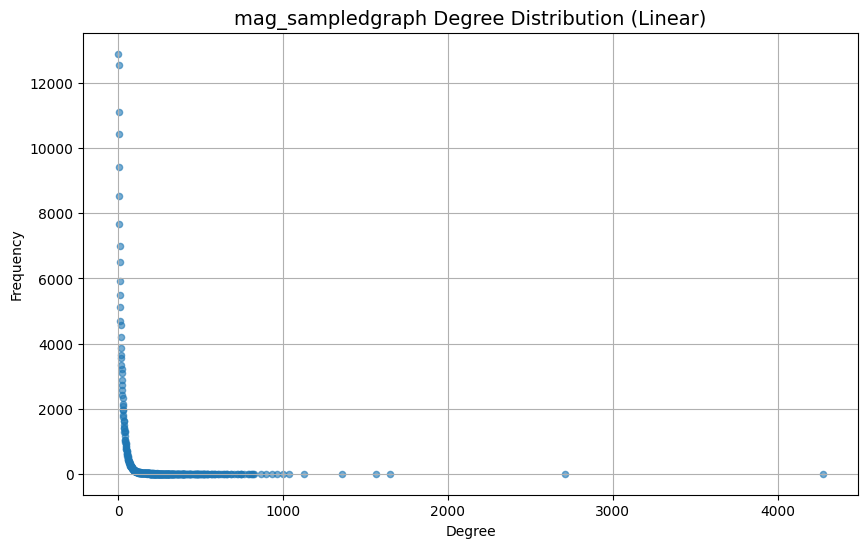

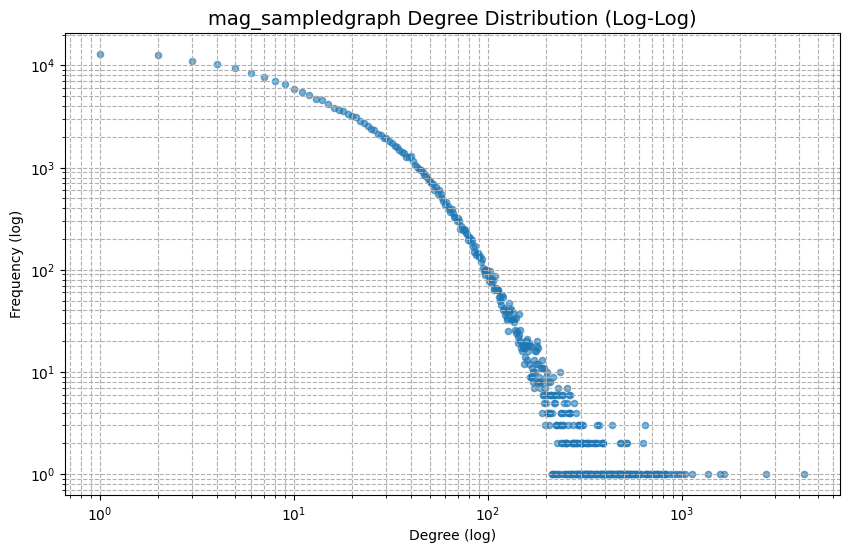

116310


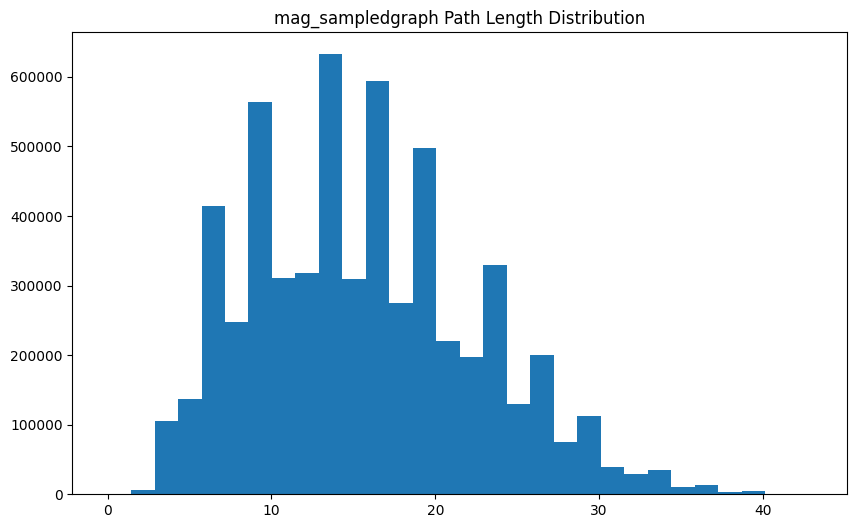

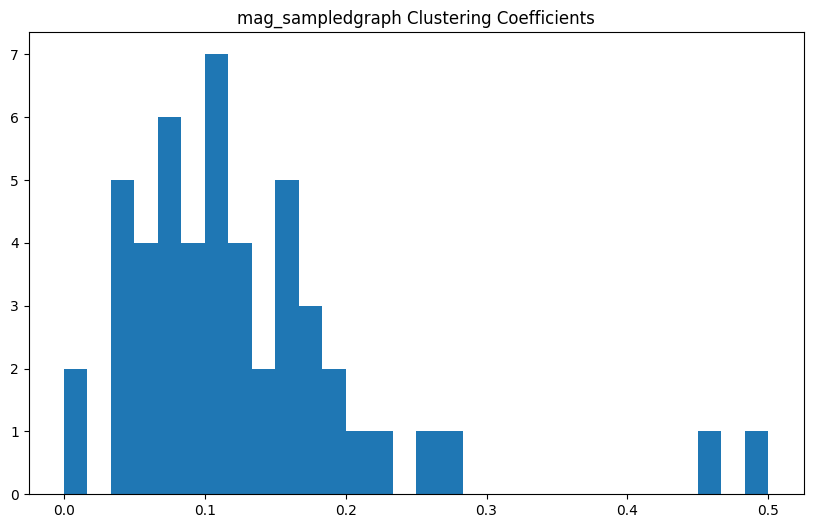

Number of nodes in sampled graph: 200000
Number of edges in sampled graph: 2064672


In [ ]:
import dgl
#转换成network之后可以计算graph的特征并绘图
sampled_graph_nx = dgl.to_networkx(sampled_graph, edge_attrs=None, node_attrs=None)
mag_metrics = analyze_network(sampled_graph_nx, "mag_sampledgraph")

# 检查子图信息
print("Number of nodes in sampled graph:", sampled_graph.num_nodes())
print("Number of edges in sampled graph:", sampled_graph.num_edges())


In [ ]:
print(mag_metrics)

{'num_nodes': 200000, 'num_edges': 2064672, 'avg_in_degree': np.float64(10.32336), 'avg_out_degree': np.float64(10.32336), 'density': 5.161705808529043e-05, 'gc_nodes': 116310, 'avg_path_length': np.float64(15.685550683518183), 'avg_clustering': np.float64(0.1273855587991072)}


In [ ]:
print(mag_graph)
print(paper_graph)
print(sampled_graph)

Here we comes to train the sampled mag graph.

# Third Section:In this section, we can train the graphsage on sampled mag graph using the original embedding.

## 3.1 First we define the architecture of GraphSAGE

In [ ]:
import torch
import torch.nn.functional as F
import dgl
from dgl.nn import SAGEConv
from sklearn.metrics import accuracy_score

# Define GraphSAGE model
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_layers, dropout):
        super(GraphSAGE, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(SAGEConv(in_feats, hidden_feats, aggregator_type='mean'))
        for _ in range(num_layers - 2):
            self.layers.append(SAGEConv(hidden_feats, hidden_feats, aggregator_type='mean'))
        self.layers.append(SAGEConv(hidden_feats, out_feats, aggregator_type='mean'))
        self.dropout = dropout

    def forward(self, g, x):
        for i, layer in enumerate(self.layers):
            x = layer(g, x)
            if i != len(self.layers) - 1:  # No activation on the last layer
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)
        return x

# Training loop
def train(model, graph, features, labels, train_idx, optimizer):
    model.train()
    optimizer.zero_grad()
    out = model(graph, features)
    loss = F.cross_entropy(out[train_idx], labels[train_idx], label_smoothing=0.1)
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluation loop
@torch.no_grad()
def evaluate(model, graph, features, labels, split_idx):
    model.eval()
    out = model(graph, features)
    preds = out.argmax(dim=1)
    train_acc = accuracy_score(labels[split_idx['train']].cpu(), preds[split_idx['train']].cpu())
    valid_acc = accuracy_score(labels[split_idx['valid']].cpu(), preds[split_idx['valid']].cpu())
    test_acc = accuracy_score(labels[split_idx['test']].cpu(), preds[split_idx['test']].cpu())
    return train_acc, valid_acc, test_acc

In [ ]:
print(sampled_ids)
print(mag_train_idx['paper'])

## 3.2 Then we split the train dataset, validation dataset and test dataset

In [ ]:
#load the sampled graph
import pickle
#load the saved sampled graph mag:
def load_graph(filename):
    with open(filename, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {filename}")
    return graph

# Load the graph
sampled_graph = load_graph("sampled_graph_mag_200000.pkl")

# Verify the loaded graph structure
print("Node data:", sampled_graph.ndata.keys())
print("Edge data:", sampled_graph.edata.keys())


In [ ]:
import torch

# 获取所有节点的年份信息
years = sampled_graph.ndata['year'].flatten()  # 将年份信息拉平为一维张量

# 使用 PyTorch 或 NumPy 统计年份分布
unique_years, year_counts = torch.unique(years, return_counts=True)

# 打印年份统计结果
print("Year Distribution:")
for year, count in zip(unique_years.tolist(), year_counts.tolist()):
    print(f"Year: {year}, Count: {count}")


# 按年份划分训练集、验证集和测试集
def split_by_year(graph, years, train_cutoff, valid_cutoff):
    # 创建布尔掩码
    train_mask = (years <= train_cutoff)  # 截止到 train_cutoff 年份属于训练集
    valid_mask = (years > train_cutoff) & (years <= valid_cutoff)  # 在 valid_cutoff 年份之间属于验证集
    test_mask = (years > valid_cutoff)  # 剩余的属于测试集

    # 将掩码添加到图中
    graph.ndata['train_mask'] = train_mask
    graph.ndata['valid_mask'] = valid_mask
    graph.ndata['test_mask'] = test_mask

    return graph

# 假设训练集为 2015 年及以前，验证集为 2016-2017 年，测试集为 2018 年及以后
train_cutoff_year = 2013
valid_cutoff_year = 2015

# 更新 sampled_graph 的掩码
sampled_graph = split_by_year(sampled_graph, years, train_cutoff_year, valid_cutoff_year)

# 验证划分结果
print("Number of training nodes:", sampled_graph.ndata['train_mask'].sum().item())
print("Number of validation nodes:", sampled_graph.ndata['valid_mask'].sum().item())
print("Number of testing nodes:", sampled_graph.ndata['test_mask'].sum().item())


## 3.3 Finally we start training

In [ ]:
def main_sampled_graph(sampled_graph):
    # Set up training parameters
    features = sampled_graph.ndata['feat']

    #notice the shape of the labels. This better be changed during the create of the dataset, I forgot. So need to do this tansform every time.
    sampled_labels = sampled_graph.ndata['y']
    sampled_labels = sampled_labels.squeeze(1)  # Convert shape from [20000, 1] to [20000]
    #sampled_graph.ndata['label'] = sampled_graph.ndata['y'].squeeze(1) #we don't change the original dataset
    # Extract masks
    train_idx = torch.nonzero(sampled_graph.ndata['train_mask'], as_tuple=True)[0]
    valid_idx = torch.nonzero(sampled_graph.ndata['valid_mask'], as_tuple=True)[0]
    test_idx = torch.nonzero(sampled_graph.ndata['test_mask'], as_tuple=True)[0]
    split_idx = {'train': train_idx, 'valid': valid_idx, 'test': test_idx}

    in_feats = features.shape[1]
    hidden_feats = 512
    out_feats = sampled_labels.max().item() + 1
    num_layers = 3
    dropout = 0.3

    model = GraphSAGE(in_feats, hidden_feats, out_feats, num_layers, dropout)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

    print("Features shape:", features.shape)
    print("Sampled Labels shape:", sampled_labels.shape)
    print("Train indices shape:", train_idx.shape)

    # Training loop
    for epoch in range(200):  # Example: 100 epochs
        loss = train(model, sampled_graph, features, sampled_labels, train_idx, optimizer)
        train_acc, valid_acc, test_acc = evaluate(model, sampled_graph, features, sampled_labels, split_idx)
        print(f'Epoch {epoch + 1}: Loss = {loss:.4f}, Train Acc = {train_acc:.4f}, '
                  f'Valid Acc = {valid_acc:.4f}, Test Acc = {test_acc:.4f}')

main_sampled_graph(sampled_graph)

Features shape: torch.Size([200000, 128])
Sampled Labels shape: torch.Size([200000])
Train indices shape: torch.Size([128833])


/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch 1: Loss = 6.0597, Train Acc = 0.1116, Valid Acc = 0.1648, Test Acc = 0.1675
Epoch 2: Loss = 5.7003, Train Acc = 0.0704, Valid Acc = 0.1335, Test Acc = 0.1860
Epoch 3: Loss = 4.9591, Train Acc = 0.1325, Valid Acc = 0.1517, Test Acc = 0.1962
Epoch 4: Loss = 5.0384, Train Acc = 0.1325, Valid Acc = 0.1164, Test Acc = 0.1468
Epoch 5: Loss = 4.9779, Train Acc = 0.1291, Valid Acc = 0.1071, Test Acc = 0.1311
Epoch 6: Loss = 4.8602, Train Acc = 0.1653, Valid Acc = 0.1860, Test Acc = 0.2299
Epoch 7: Loss = 4.7279, Train Acc = 0.1696, Valid Acc = 0.2422, Test Acc = 0.3161
Epoch 8: Loss = 4.5972, Train Acc = 0.1642, Valid Acc = 0.2378, Test Acc = 0.3102
Epoch 9: Loss = 4.4891, Train Acc = 0.1672, Valid Acc = 0.2379, Test Acc = 0.3082
Epoch 10: Loss = 4.4044, Train Acc = 0.1818, Valid Acc = 0.2468, Test Acc = 0.3196
Epoch 11: Loss = 4.3036, Train Acc = 0.2003, Valid Acc = 0.2477, Test Acc = 0.3153
Epoch 12: Loss = 4.2254, Train Acc = 0.2012, Valid Acc = 0.2144, Test Acc = 0.2642
Epoch 13: Los

In [ ]:
print(sampled_graph.ndata['y'].shape)

# Fourth Section: similarly we train the graphsage on arxiv dataset using original embedding

In [ ]:
#This one is for cpu
import torch
import torch.nn.functional as F
import dgl
from dgl.nn import SAGEConv
from ogb.nodeproppred import DglNodePropPredDataset
from sklearn.metrics import accuracy_score

#This below is the same with the function in section 3
# 定义 GraphSAGE 模型
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_layers, dropout):
        super(GraphSAGE, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(SAGEConv(in_feats, hidden_feats, aggregator_type='mean'))
        for _ in range(num_layers - 2):
            self.layers.append(SAGEConv(hidden_feats, hidden_feats, aggregator_type='mean'))
        self.layers.append(SAGEConv(hidden_feats, out_feats, aggregator_type='mean'))
        self.dropout = dropout

    def forward(self, g, x):
        for i, layer in enumerate(self.layers):
            x = layer(g, x)
            if i != len(self.layers) - 1:  # 最后一层不使用激活
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)
        return x

# 训练函数
def train(model, graph, features, labels, train_idx, optimizer):
    model.train()
    optimizer.zero_grad()
    out = model(graph, features)
    loss = F.cross_entropy(out[train_idx], labels[train_idx], label_smoothing=0.1)  # 添加标签平滑
    loss.backward()
    optimizer.step()
    return loss.item()

# 验证/测试函数
@torch.no_grad()
def evaluate(model, graph, features, labels, split_idx):
    model.eval()
    out = model(graph, features)
    preds = out.argmax(dim=1)

    train_acc = accuracy_score(labels[split_idx['train']].cpu(), preds[split_idx['train']].cpu())
    valid_acc = accuracy_score(labels[split_idx['valid']].cpu(), preds[split_idx['valid']].cpu())
    test_acc = accuracy_score(labels[split_idx['test']].cpu(), preds[split_idx['test']].cpu())

    return train_acc, valid_acc, test_acc

#Only the main function changed
# 主函数
def main():
    # 1. 加载 ogbn-arxiv 数据集
    arxiv_dataset = DglNodePropPredDataset(name="ogbn-arxiv")
    arxiv_split_idx = arxiv_dataset.get_idx_split()
    arxiv_train_idx, arxiv_valid_idx, arxiv_test_idx = (
        arxiv_split_idx["train"], arxiv_split_idx["valid"], arxiv_split_idx["test"]
    )
    arxiv_graph, arxiv_label = arxiv_dataset[0]  # 图和标签

    # 2. 数据预处理
    arxiv_graph.ndata['label'] = arxiv_label.squeeze(1)  # 将标签存储到图节点数据中
    arxiv_graph = dgl.to_bidirected(arxiv_graph, copy_ndata=True)  # 转换为无向图
    arxiv_graph = dgl.add_self_loop(arxiv_graph)  # 添加自环
    arxiv_graph.create_formats_()  # 转换为稀疏格式，加速计算

    # 3. 设置特征和标签
    features = arxiv_graph.ndata['feat']
    labels = arxiv_graph.ndata['label']
    split_idx = {
        'train': arxiv_train_idx,
        'valid': arxiv_valid_idx,
        'test': arxiv_test_idx,
    }

    # 4. 将数据移到 GPU（如果可用）
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    features = features.to(device)
    labels = labels.to(device)
    arxiv_graph = arxiv_graph.to(device)

    # 5. 初始化模型和优化器
    in_feats = features.shape[1]
    hidden_feats = 512  # 隐藏层维度
    out_feats = labels.max().item() + 1  # 输出类别数
    num_layers = 3  # GraphSAGE 层数
    dropout = 0.3

    model = GraphSAGE(in_feats, hidden_feats, out_feats, num_layers, dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

    # 6. 训练和评估
    for epoch in range(200):  # 示例：200 轮训练
        loss = train(model, arxiv_graph, features, labels, split_idx['train'], optimizer)
        train_acc, valid_acc, test_acc = evaluate(model, arxiv_graph, features, labels, split_idx)

        print(f"Epoch {epoch + 1}: Loss = {loss:.4f}, "
              f"Train Acc = {train_acc:.4f}, Valid Acc = {valid_acc:.4f}, Test Acc = {test_acc:.4f}")

if __name__ == "__main__":
    main()


In [ ]:
#Output training process

# Fifth Section:now we can train the graphsage using the 2 dataset together. We can start from 5.5 when training.

## 5.1 Align feature dimension



In [ ]:
import torch
import dgl

# 对齐特征维度, 如果维度一样可以不用对齐
def align_feature_dimension(graph1, graph2):
    feat_dim1 = graph1.ndata['feat'].shape[1]
    feat_dim2 = graph2.ndata['feat'].shape[1]

    # 如果维度不相等，补齐特征 #都是128维度，所以不用对齐
    if feat_dim1 < feat_dim2:
        pad = torch.zeros(graph1.num_nodes(), feat_dim2 - feat_dim1).to(graph1.ndata['feat'].device)
        graph1.ndata['feat'] = torch.cat([graph1.ndata['feat'], pad], dim=1)
    elif feat_dim2 < feat_dim1:
        pad = torch.zeros(graph2.num_nodes(), feat_dim1 - feat_dim2).to(graph2.ndata['feat'].device)
        graph2.ndata['feat'] = torch.cat([graph2.ndata['feat'], pad], dim=1)

    return graph1, graph2

#sampled_graph, arxiv_graph = align_feature_dimension(sampled_graph, arxiv_graph)
#print(sampled_graph.ndata['feat'].shape)
#print(arxiv_graph.ndata['feat'].shape)

## 5.2 Add label to 2 graph, add ID to arxiv_graph, for sampled_graph, there has been ID.

In [ ]:
#由于前面处理了label数据，现在需要判断前面是否处理过，如果没处理过则进行处理 如果运行了这个再运行前面的训练代码会报错，因为label已经被处理过了
# 检查 arxiv_graph 中是否存在 'label' 数据，如果不存在就赋值
if 'label' not in arxiv_graph.ndata or arxiv_graph.ndata['label'] is None:
    arxiv_graph.ndata['label'] = arxiv_label

# 检查 sampled_graph 中是否存在 'y' 数据，如果不存在就赋值
if 'y' not in sampled_graph.ndata or sampled_graph.ndata['y'] is None:
    sampled_graph.ndata['y'] = sampled_graph.ndata['y']


# 检查 arxiv_label 是否是一维向量
if arxiv_label.dim() > 1:
    arxiv_graph.ndata['label'] = arxiv_label.squeeze(1)

# 检查 sampled_graph 的 y 是否是一维向量
if sampled_graph.ndata['y'].dim() > 1:
    sampled_graph.ndata['y'] = sampled_graph.ndata['y'].squeeze(1)

print(arxiv_graph.ndata['label'])
print(sampled_graph.ndata['y'])

In [ ]:
# 为 arxiv_graph 添加原始 ID
arxiv_graph.ndata['_ID'] = torch.arange(arxiv_graph.num_nodes(), dtype=torch.int64)

# 验证 _ID 是否添加成功
print("Node IDs (_ID):", arxiv_graph.ndata['_ID'][:20])  # 打印前10个节点的 ID

print(sampled_graph.ndata['_ID'][:20])

## 5.3 merge 2 graph, node and edge;

1)store attritute "source" to identity the source of the node； (Graph1 ：sampld_graph节点来源标记为 0; Graph2 ：arxiv_graph节点来源标记为 1. )

2)store sttribute "_ID" to reserve the nodeID for mapping to the paperId.



In [ ]:
print(sampled_graph)
print(arxiv_graph)

In [ ]:
# 合并两个图
def merge_graphs(graph1, graph2):
    import torch
    # 合并节点特征
    #cat中的dim参数表示第0维合并，第1维，128维度保持不变
    print(graph1.ndata['feat'].shape)
    print(graph2.ndata['feat'].shape)
    combined_feat = torch.cat([graph1.ndata['feat'], graph2.ndata['feat']], dim=0)
    print(combined_feat.shape)

    import torch.nn.functional as F

    def combine_and_one_hot_encode(graph1, graph2):
        # 获取标签
        labels1 = graph1.ndata['y']
        labels2 = graph2.ndata['label']

        # 合并标签，将两个图的标签范围扩展为 [0, total_classes)
        total_classes = labels1.max().item() + labels2.max().item() + 2  # 总类别数为两个图的最大类别+1
        print(labels1)
        print(labels2)
        combined_labels = torch.cat([labels1, labels2], dim=0)
        print(combined_labels)

        # 进行 one-hot 编码
        one_hot_encoded_labels = F.one_hot(combined_labels, num_classes=total_classes)
        print(one_hot_encoded_labels[-1])

        return one_hot_encoded_labels

    # 合并并进行编码
    combined_labels = combine_and_one_hot_encode(graph1, graph2)
    print("One-hot Encoded Labels:")
    print(combined_labels[3])

    # 合并年份信息
    combined_year = torch.cat([graph1.ndata['year'], graph2.ndata['year']], dim=0)

    # 合并原始节点 ID
    combined_id = torch.cat([graph1.ndata['_ID'], graph2.ndata['_ID']], dim=0)

    #添加来源标签
    graph1_source = torch.zeros(graph1.num_nodes(), dtype=torch.int64)  # Graph1 ：sampld_graph节点来源标记为 0
    graph2_source = torch.ones(graph2.num_nodes(), dtype=torch.int64)   # Graph2 ：arxiv_graph节点来源标记为 1
    combined_source = torch.cat([graph1_source, graph2_source], dim=0)


    # 合并标签
    # 合并边信息
    graph1_edges = graph1.edges()
    graph2_edges = graph2.edges()

    # 合并边 这里对graph1的起始点做了位置偏移，所以合并后的边没有重合的
    combined_src = torch.cat([graph1_edges[0], graph2_edges[0] + graph1.num_nodes()])
    combined_dst = torch.cat([graph1_edges[1], graph2_edges[1] + graph1.num_nodes()])


    # 创建新图
    combined_graph = dgl.graph((combined_src, combined_dst))
    combined_graph.ndata['feat'] = combined_feat
    combined_graph.ndata['label'] = combined_labels
    combined_graph.ndata['graph_source'] = combined_source  # 添加来源标签
    combined_graph.ndata['year'] = combined_year
    combined_graph.ndata['_ID'] = combined_id

    print("Graph 1 edges:", graph1.num_edges())
    print("Graph 2 edges:", graph2.num_edges())
    print("Combined graph edges:", combined_graph.num_edges())
    print("Combined graph nodes:", combined_graph.num_nodes())
    print("Sample of graph_source:", combined_graph.ndata['graph_source'][:10])
    print("Sample of years:", combined_graph.ndata['year'][:10])
    print("Sample of _ID:", combined_graph.ndata['_ID'][:10])

    return combined_graph

combined_graph = merge_graphs(sampled_graph, arxiv_graph)

In [ ]:
print(combined_graph.ndata["_ID"].shape)
print(combined_graph.ndata["graph_source"].shape)

In [ ]:
def access_original_node(combined_graph, node_id, sampled_graph, arxiv_graph):
    # 确定节点来源
    print("hi")
    graph_source = combined_graph.ndata['graph_source'][node_id].item()  # 来源标识
    print(graph_source)
    print(combined_graph.ndata)
    original_id = combined_graph.ndata['_ID'][node_id] # 原始 ID
    print(original_id)

    if graph_source == 0:
        print(f"Node {node_id} comes from 'sampled_graph', original ID: {original_id}")

    elif graph_source == 1:
        print(f"Node {node_id} comes from 'arxiv_graph', original ID: {original_id}")


# 访问第 0 个节点的数据
access_original_node(combined_graph, node_id=2, sampled_graph=sampled_graph, arxiv_graph=arxiv_graph)

# 访问第 200,000 个节点的数据
access_original_node(combined_graph, node_id=200003, sampled_graph=sampled_graph, arxiv_graph=arxiv_graph)


## 5.4 Add the masks attribute to the combined graph

remeber the order id of the node in the combined graph can't be seen as the masking id, when we are doing the mask id, always think about the _ID attribute.

One way to check this is to output the year of the train node, in arxiv dataset, they are less than 2018, while in the sampled dataset, they are less than 2013.



In [ ]:
graph1 = sampled_graph
graph2 = arxiv_graph
#存储原始状态

In [ ]:
def check_and_initialize_masks(sampled_graph, arxiv_graph):
    # 处理 sampled_graph
    if 'train_mask' not in sampled_graph.ndata or 'valid_mask' not in sampled_graph.ndata or 'test_mask' not in sampled_graph.ndata:
        print("Initializing masks for sampled_graph...")
        years = sampled_graph.ndata['year'].flatten()  # 获取年份信息
        print(years)
        train_cutoff_year = 2013
        valid_cutoff_year = 2015

        # 划分训练集、验证集和测试集
        sampled_graph = split_by_year(sampled_graph, years, train_cutoff_year, valid_cutoff_year)

        # 验证划分结果
        print("Number of training nodes:", sampled_graph.ndata['train_mask'].sum().item())
        print("Number of validation nodes:", sampled_graph.ndata['valid_mask'].sum().item())
        print("Number of testing nodes:", sampled_graph.ndata['test_mask'].sum().item())
    else:
        print("Masks for sampled_graph already initialized!")

    # 处理 arxiv_graph
    if 'train_mask' not in arxiv_graph.ndata or 'valid_mask' not in arxiv_graph.ndata or 'test_mask' not in arxiv_graph.ndata:
        print("Initializing masks for arxiv_graph...")
        # 加载 ogbn-arxiv 数据集
        arxiv_dataset = DglNodePropPredDataset(name="ogbn-arxiv")
        arxiv_split_idx = arxiv_dataset.get_idx_split()
        arxiv_train_idx, arxiv_valid_idx, arxiv_test_idx = (
            arxiv_split_idx["train"], arxiv_split_idx["valid"], arxiv_split_idx["test"]
        )
        #arxiv_graph.ndata['label'] = arxiv_graph.ndata['label'].squeeze(1)  # 确保标签是一维向量

        # 设置掩码
        arxiv_graph.ndata['train_mask'] = torch.zeros(arxiv_graph.num_nodes(), dtype=torch.bool)
        arxiv_graph.ndata['valid_mask'] = torch.zeros(arxiv_graph.num_nodes(), dtype=torch.bool)
        arxiv_graph.ndata['test_mask'] = torch.zeros(arxiv_graph.num_nodes(), dtype=torch.bool)

        print(arxiv_train_idx)

        # 根据划分索引设置掩码
        arxiv_graph.ndata['train_mask'][arxiv_train_idx] = True #在对应的点设为mask， 这里的idx是直接的索引
        arxiv_graph.ndata['valid_mask'][arxiv_valid_idx] = True
        arxiv_graph.ndata['test_mask'][arxiv_test_idx] = True

        print(arxiv_graph.ndata['train_mask'])

        # 验证划分结果
        print("Number of training nodes:", arxiv_graph.ndata['train_mask'].sum().item())
        print("Number of validation nodes:", arxiv_graph.ndata['valid_mask'].sum().item())
        print("Number of testing nodes:", arxiv_graph.ndata['test_mask'].sum().item())
    else:
        print("Masks for arxiv_graph already initialized!")

    return sampled_graph, arxiv_graph

# 使用分割函数
def split_by_year(graph, years, train_cutoff, valid_cutoff):
    # 创建布尔掩码
    train_mask = (years <= train_cutoff)  # 截止到 train_cutoff 年份属于训练集
    valid_mask = (years > train_cutoff) & (years <= valid_cutoff)  # 在 valid_cutoff 年份之间属于验证集
    test_mask = (years > valid_cutoff)  # 剩余的属于测试集

    print(train_mask)
    print(valid_mask)
    print(test_mask)

    # 将掩码添加到图中
    graph.ndata['train_mask'] = train_mask
    graph.ndata['valid_mask'] = valid_mask
    graph.ndata['test_mask'] = test_mask

    return graph




In [ ]:
sampled_graph, arxiv_graph = check_and_initialize_masks(sampled_graph,arxiv_graph)

In [ ]:
#sampled_graph = graph1
#arxiv_graph = graph2

In [ ]:
print(sampled_graph)
print(arxiv_graph)

In [ ]:
# 合并掩码
def merge_masks(graph1, graph2):

    train_mask = torch.cat([graph1.ndata['train_mask'], graph2.ndata['train_mask']], dim=0)
    valid_mask = torch.cat([graph1.ndata['valid_mask'], graph2.ndata['valid_mask']], dim=0)
    test_mask = torch.cat([graph1.ndata['test_mask'], graph2.ndata['test_mask']], dim=0)

    return train_mask, valid_mask, test_mask

# 合并掩码
combined_train_mask, combined_valid_mask, combined_test_mask = merge_masks(sampled_graph, arxiv_graph)

In [ ]:
print(combined_train_mask[-2000:])

print(arxiv_graph.ndata['train_mask'][:100]) # for arxiv , the paper is sorted by year already, so the front are training , the last are testing

print(combined_train_mask[:10])
print(sampled_graph.ndata['train_mask'][:10])

In [ ]:
# 对齐特征维度 如果维度一样可以不用对齐
#sampled_graph, arxiv_graph = align_feature_dimension(sampled_graph, arxiv_graph)

# 合并两个图
#combined_graph = merge_graphs(sampled_graph, arxiv_graph)

# 合并掩码
#combined_train_mask, combined_valid_mask, combined_test_mask = merge_masks(sampled_graph, arxiv_graph)


# 添加合并后的掩码到图中
combined_graph.ndata['train_mask'] = combined_train_mask
combined_graph.ndata['valid_mask'] = combined_valid_mask
combined_graph.ndata['test_mask'] = combined_test_mask

# 验证结果
print("Number of nodes in combined graph:", combined_graph.num_nodes())
print("Number of edges in combined graph:", combined_graph.num_edges())
print("Number of training nodes:", combined_train_mask.sum().item())
print("Number of validation nodes:", combined_valid_mask.sum().item())
print("Number of testing nodes:", combined_test_mask.sum().item())


## 5.5 save and load the graph

In [ ]:
print(combined_graph)
import pickle

def save_graph(graph, filename):
    with open(filename, 'wb') as f:
        pickle.dump(graph, f)
    print(f"Graph saved to {filename}")

# 保存图并压缩
#save_graph(combined_graph, "combined_graph.pkl")

In [ ]:
import gzip
import pickle

def save_graph_compressed(graph, filename):
    # 使用 gzip 压缩保存图
    with gzip.open(filename, 'wb') as f:
        pickle.dump(graph, f)
    print(f"Graph saved and compressed to {filename}")


# 压缩保存图
#save_graph_compressed(combined_graph, "combined_graph.pkl.gz")

In [ ]:
# 加载压缩图
import gzip
import pickle
def load_graph_compressed(filename):
    # 使用 gzip 解压缩并加载图
    with gzip.open(filename, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {filename}")
    return graph
combined_graph = load_graph_compressed("combined_graph.pkl.gz")

# 验证加载后的图结构
print("Node data:", combined_graph.ndata.keys())
print("Edge data:", combined_graph.edata.keys())

In [ ]:
print(combined_graph)

Graph(num_nodes=369343, num_edges=3230915,
      ndata_schemes={'feat': Scheme(shape=(128,), dtype=torch.float32), 'label': Scheme(shape=(389,), dtype=torch.int64), 'graph_source': Scheme(shape=(), dtype=torch.int64), 'year': Scheme(shape=(1,), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'valid_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})


## 5.6 Finally train it using graphalign

In [ ]:
print(arxiv_label)

In [ ]:
#This one is for cpu
import torch
import torch.nn.functional as F
import dgl
from dgl.nn import SAGEConv
from ogb.nodeproppred import DglNodePropPredDataset
from sklearn.metrics import accuracy_score

#This below is the same with the function in section 3
# 定义 GraphSAGE 模型
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_layers, dropout):
        super(GraphSAGE, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(SAGEConv(in_feats, hidden_feats, aggregator_type='mean'))
        for _ in range(num_layers - 2):
            self.layers.append(SAGEConv(hidden_feats, hidden_feats, aggregator_type='mean'))
        self.layers.append(SAGEConv(hidden_feats, out_feats, aggregator_type='mean'))
        self.dropout = dropout

    def forward(self, g, x):
        for i, layer in enumerate(self.layers):
            x = layer(g, x)
            if i != len(self.layers) - 1:  # 最后一层不使用激活
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)
        return x

# 训练函数
def train(model, graph, features, labels, train_idx, optimizer):
    model.train()
    optimizer.zero_grad()
    labels = labels.float()
    out = model(graph, features)
    loss = F.cross_entropy(out[train_idx], labels[train_idx], label_smoothing=0.1)  # 添加标签平滑
    loss.backward()
    optimizer.step()
    return loss.item()

# 验证/测试函数
@torch.no_grad()
def evaluate(model, graph, features, labels, split_idx):
    model.eval()
    out = model(graph, features)
    preds = out.argmax(dim=1)

    # 转换标签为类别索引形式
    labels_idx = labels.argmax(dim=1)  # 从 one-hot 编码转为索引形式

    train_acc = accuracy_score(labels_idx[split_idx['train']].cpu(), preds[split_idx['train']].cpu())
    valid_acc = accuracy_score(labels_idx[split_idx['valid']].cpu(), preds[split_idx['valid']].cpu())
    test_acc = accuracy_score(labels_idx[split_idx['test']].cpu(), preds[split_idx['test']].cpu())

    return train_acc, valid_acc, test_acc

In [ ]:
import torch
import dgl
import os

def batchify(graph, train_idx, batch_size):
    # 将训练节点划分为批次
    for i in range(0, len(train_idx), batch_size):
        batch_nodes = train_idx[i:i + batch_size]
        subgraph = dgl.node_subgraph(graph, batch_nodes)  # 创建子图
        yield subgraph, batch_nodes


# 提取特征和标签
features = combined_graph.ndata['feat']
labels = combined_graph.ndata['label']
train_idx = torch.nonzero(combined_graph.ndata['train_mask'], as_tuple=True)[0]
valid_idx = torch.nonzero(combined_graph.ndata['valid_mask'], as_tuple=True)[0]
test_idx = torch.nonzero(combined_graph.ndata['test_mask'], as_tuple=True)[0]

split_idx = {'train': train_idx, 'valid': valid_idx, 'test': test_idx}

# 将数据移动到合适的设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
features = features.to(device)
labels = labels.to(device)
combined_graph = combined_graph.to(device)

# 初始化模型和优化器
in_feats = features.shape[1]
hidden_feats = 512
out_feats = labels.shape[1]  # 输出类别数 (来自 one-hot 编码)
num_layers = 3
dropout = 0.3

model = GraphSAGE(in_feats, hidden_feats, out_feats, num_layers, dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# 创建保存路径
save_dir = "./saved_models"
os.makedirs(save_dir, exist_ok=True)

# 定义批次大小
batch_size = 1024

best_valid_acc = 0
for epoch in range(200):
    model.train()
    total_loss = 0

    # 手动处理每个批次
    for subgraph, batch_nodes in batchify(combined_graph, train_idx, batch_size):
        subgraph = subgraph.to(device)  # 将子图移动到设备
        batch_feats = subgraph.ndata['feat']
        batch_labels = subgraph.ndata['label']

        optimizer.zero_grad()
        logits = model(subgraph, batch_feats)
        loss = -(batch_labels * torch.log_softmax(logits, dim=1)).sum(dim=1).mean()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # 验证和测试
    train_acc, valid_acc, test_acc = evaluate(model, combined_graph, features, labels,
                                              {'train': train_idx, 'valid': valid_idx, 'test': test_idx})

    print(f"Epoch {epoch + 1}: Loss = {total_loss:.4f}, "
          f"Train Acc = {train_acc:.4f}, Valid Acc = {valid_acc:.4f}, Test Acc = {test_acc:.4f}")

    # 保存验证集上最好的模型
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model_path = os.path.join(save_dir, "best_model.pth")
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved at epoch {epoch + 1}: {best_model_path}")

    # 每 50 个 epoch 保存一次模型
    if (epoch + 1) % 50 == 0:
        model_save_path = os.path.join(save_dir, f"model_epoch_{epoch + 1}.pth")
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at epoch {epoch + 1}: {model_save_path}")

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Graph loaded from combined_graph.pkl.gz


/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch 001 | Loss: 677.0746 | Train Acc: 0.1667 | Valid Acc: 0.1656 | Test Acc: 0.2654
Epoch 002 | Loss: 640.5887 | Train Acc: 0.1978 | Valid Acc: 0.2079 | Test Acc: 0.2885
Epoch 003 | Loss: 629.6169 | Train Acc: 0.2102 | Valid Acc: 0.2202 | Test Acc: 0.3013
Epoch 004 | Loss: 607.5822 | Train Acc: 0.2403 | Valid Acc: 0.2771 | Test Acc: 0.3534
Epoch 005 | Loss: 602.0725 | Train Acc: 0.2394 | Valid Acc: 0.2778 | Test Acc: 0.3574
Epoch 006 | Loss: 598.0709 | Train Acc: 0.2822 | Valid Acc: 0.3274 | Test Acc: 0.3998
Epoch 007 | Loss: 585.5531 | Train Acc: 0.2758 | Valid Acc: 0.3171 | Test Acc: 0.3929
Epoch 008 | Loss: 582.8715 | Train Acc: 0.2752 | Valid Acc: 0.3229 | Test Acc: 0.3961
Epoch 009 | Loss: 577.6688 | Train Acc: 0.2819 | Valid Acc: 0.3205 | Test Acc: 0.3797
Epoch 010 | Loss: 574.4338 | Train Acc: 0.2990 | Valid Acc: 0.3404 | Test Acc: 0.4107
Epoch 011 | Loss: 574.5555 | Train Acc: 0.2857 | Valid Acc: 0.3301 | Test Acc: 0.4065
Epoch 012 | Loss: 570.2805 | Train Acc: 0.2969 | Valid

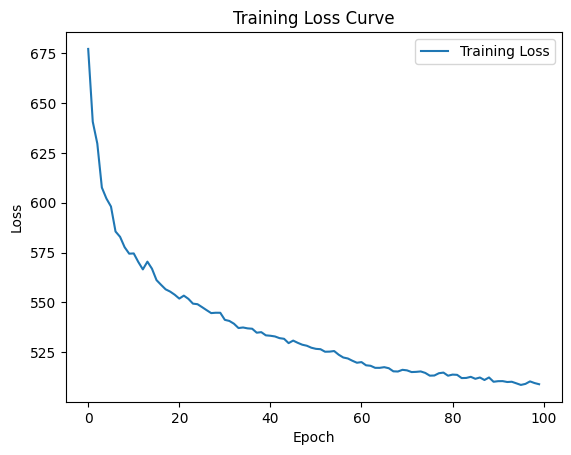

GraphSAGE(
  (layers): ModuleList(
    (0): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=128, out_features=512, bias=False)
      (fc_self): Linear(in_features=128, out_features=512, bias=True)
    )
    (1): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=512, out_features=512, bias=False)
      (fc_self): Linear(in_features=512, out_features=512, bias=True)
    )
    (2): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=512, out_features=389, bias=False)
      (fc_self): Linear(in_features=512, out_features=389, bias=True)
    )
  )
)

In [ ]:
#封装上述的训练流程
import os
import torch
import torch.nn.functional as F
import dgl
from dgl.nn import SAGEConv
import matplotlib.pyplot as plt

# 定义 GraphSAGE 模型
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_layers, dropout):
        super(GraphSAGE, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(SAGEConv(in_feats, hidden_feats, aggregator_type='mean'))
        for _ in range(num_layers - 2):
            self.layers.append(SAGEConv(hidden_feats, hidden_feats, aggregator_type='mean'))
        self.layers.append(SAGEConv(hidden_feats, out_feats, aggregator_type='mean'))
        self.dropout = dropout

    def forward(self, g, x):
        for i, layer in enumerate(self.layers):
            x = layer(g, x)
            if i != len(self.layers) - 1:  # 最后一层不使用激活
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)
        return x

# 封装训练和验证函数
def train_epoch(model, graph, features, labels, train_idx, optimizer, batch_size):
    model.train()
    total_loss = 0
    for i in range(0, len(train_idx), batch_size):
        batch_nodes = train_idx[i:i + batch_size]
        subgraph = dgl.node_subgraph(graph, batch_nodes).to(features.device)
        batch_feats = subgraph.ndata['feat']
        batch_labels = subgraph.ndata['label']

        optimizer.zero_grad()
        logits = model(subgraph, batch_feats)
        loss = -(batch_labels * torch.log_softmax(logits, dim=1)).sum(dim=1).mean()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss

@torch.no_grad()
def evaluate(model, graph, features, labels, split_idx):
    model.eval()
    logits = model(graph, features)
    preds = logits.argmax(dim=1)
    labels_idx = labels.argmax(dim=1)  # 转为索引形式
    train_acc = (preds[split_idx['train']] == labels_idx[split_idx['train']]).float().mean().item()
    valid_acc = (preds[split_idx['valid']] == labels_idx[split_idx['valid']]).float().mean().item()
    test_acc = (preds[split_idx['test']] == labels_idx[split_idx['test']]).float().mean().item()
    return train_acc, valid_acc, test_acc

# 打印损失图像
def plot_loss(loss_history, save_path="loss_curve.png"):
    plt.figure()
    plt.plot(loss_history, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss Curve')
    plt.savefig(save_path)
    plt.show()

# 封装主训练过程
def train_graphsage(graph, features, labels, train_idx, split_idx, in_feats, hidden_feats, out_feats, num_layers, dropout, lr, epochs, batch_size, model_path=None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    features, labels, graph = features.to(device), labels.to(device), graph.to(device)

    model = GraphSAGE(in_feats, hidden_feats, out_feats, num_layers, dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    if model_path and os.path.exists(model_path):
        print(f"Loading model from {model_path}")
        model.load_state_dict(torch.load(model_path))

    loss_history = []
    best_valid_acc = 0
    save_dir = "./saved_models"
    os.makedirs(save_dir, exist_ok=True)

    for epoch in range(epochs):
        loss = train_epoch(model, graph, features, labels, train_idx, optimizer, batch_size)
        train_acc, valid_acc, test_acc = evaluate(model, graph, features, labels, split_idx)
        loss_history.append(loss)

        print(f"Epoch {epoch + 1:03d} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Valid Acc: {valid_acc:.4f} | Test Acc: {test_acc:.4f}")

        # 保存验证集上表现最好的模型
        if valid_acc > best_valid_acc:
            best_valid_acc = valid_acc
            torch.save(model.state_dict(), os.path.join(save_dir, "best_model.pth"))

    plot_loss(loss_history)
    return model

# 使用示例
import gzip
import pickle
def load_graph_compressed(filename):
    # 使用 gzip 解压缩并加载图
    with gzip.open(filename, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {filename}")
    return graph

combined_graph = load_graph_compressed("combined_graph.pkl.gz")

# 提取特征和标签
features = combined_graph.ndata['feat']
labels = combined_graph.ndata['label']
train_idx = torch.nonzero(combined_graph.ndata['train_mask'], as_tuple=True)[0]
valid_idx = torch.nonzero(combined_graph.ndata['valid_mask'], as_tuple=True)[0]
test_idx = torch.nonzero(combined_graph.ndata['test_mask'], as_tuple=True)[0]

split_idx = {'train': train_idx, 'valid': valid_idx, 'test': test_idx}

# 初始化模型和优化器
in_feats = features.shape[1]
hidden_feats = 512
out_feats = labels.shape[1]  # 输出类别数 (来自 one-hot 编码)
num_layers = 3
dropout = 0.3

train_graphsage(combined_graph, features, labels, train_idx, split_idx,
                 in_feats, hidden_feats, out_feats, num_layers, dropout,
                 lr=0.005, epochs=100, batch_size=1024, model_path="best_model.pth")


### Training Log

### Loss and Accuracy per Epoch
| Epoch | Loss     | Train Accuracy | Valid Accuracy | Test Accuracy |
|-------|----------|----------------|----------------|---------------|
| 001   | 677.0746 | 0.1667         | 0.1656         | 0.2654        |
| 002   | 640.5887 | 0.1978         | 0.2079         | 0.2885        |
| 003   | 629.6169 | 0.2102         | 0.2202         | 0.3013        |
| 004   | 607.5822 | 0.2403         | 0.2771         | 0.3534        |
| 005   | 602.0725 | 0.2394         | 0.2778         | 0.3574        |
| ...   | ...      | ...            | ...            | ...           |
| 098   | 509.5833 | 0.3324         | 0.3680         | 0.4229        |
| 099   | 508.9933 | 0.3321         | 0.3728         | 0.4248        |
| 100   | 508.9933 | 0.3321         | 0.3728         | 0.4248        |

### Observations
1. **Loss Trend**:
   - The loss consistently decreases across epochs, indicating that the model is learning effectively.

2. **Accuracy Trends**:
   - **Training Accuracy**: Plateaus around 0.33 after some initial fluctuations.
   - **Validation Accuracy**: Shows a gradual improvement with fluctuations, stabilizing around ~0.37.
   - **Test Accuracy**: Stabilizes near 0.42 towards the later epochs.

3. **Improvements Needed**:
   - The gap between training and validation accuracy suggests the potential for further hyperparameter tuning or additional regularization methods.


# Sixth Section: Summarize all the exprienments. Train the combined graph, sampled graph, arxiv graph using Graphsage architecture on 3 embeddings

## 6.1 Prepare the environment

In [ ]:
#Connect file to /content/drive, actually you colab folder path is /content/drive/MyDrive/colab
from google.colab import drive
drive.mount('/content/drive')

#Change the current path to our work directory
import os
path = "/content/drive/MyDrive/ColabNotebooks/socialScienceProject"
os.chdir(path)
os.listdir

!nvidia-smi
!pip install ogb
!pip install torch
!pip install dgl==1.1.0 -f https://data.dgl.ai/wheels/repo.html

## 6.2 Load the graph with 3 embedding

In [ ]:
import dgl

file_path = "/content/drive/MyDrive/ColabNotebooks/socialScienceProject/processed/combined_graph_with3embedding.bin"

# 通过 DGL 的方法加载图
graphs, _ = dgl.load_graphs(file_path)

# 如果文件内有多张图，选择第一张
graph = graphs[0]


## 6.3 Feature normalizatiton and dimension reduction.

### 6.3.1 For combined graph

In [ ]:
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 标准化函数
def process_feature(graph, feature_name, n_components):
    """
    对图的特征进行标准化和降维。

    参数:
    - graph: DGL 图对象
    - feature_name: 需要处理的特征名称
    - n_components: 降维后的目标维度

    返回:
    - 无，直接更新图的特征
    """
    # 标准化
    scaler = StandardScaler()
    scaled_features = torch.tensor(scaler.fit_transform(graph.ndata[feature_name].cpu().numpy())).float()
    print(f"Feature '{feature_name}' normalized. Mean: {scaled_features.mean():.4f}, Std: {scaled_features.std():.4f}")

    # 降维
    pca = PCA(n_components=n_components)
    reduced_features = torch.tensor(pca.fit_transform(scaled_features.numpy())).float()
    graph.ndata[feature_name] = reduced_features
    explained_variance = sum(pca.explained_variance_ratio_) * 100
    print(f"Feature '{feature_name}' reduced to {n_components} dimensions. Explained variance: {explained_variance:.2f}%")

# 对 ga_embedding 特征进行处理（标准化 + 降维）
process_feature(graph, feature_name='ga_embedding', n_components=128)

# 对 e5_feat 特征进行处理（标准化 + 降维）
process_feature(graph, feature_name='e5_feat', n_components=128)

print("Features processed successfully!")

Feature 'ga_embedding' normalized. Mean: -0.0000, Std: 1.0000
Feature 'ga_embedding' reduced to 128 dimensions. Explained variance: 99.63%
Feature 'e5_feat' normalized. Mean: 0.0000, Std: 1.0000
Feature 'e5_feat' reduced to 128 dimensions. Explained variance: 79.66%
Features processed successfully!


In [ ]:
print(graph)
import gzip
import pickle

def save_graph_compressed(graph, filename):
    # 使用 gzip 压缩保存图
    with gzip.open(filename, 'wb') as f:
        pickle.dump(graph, f)
    print(f"Graph saved and compressed to {filename}")


# 压缩保存图
save_graph_compressed(graph, "combined_graph_with3embedding_processed.pkl.gz")

Graph(num_nodes=369343, num_edges=3230915,
      ndata_schemes={'ga_embedding': Scheme(shape=(128,), dtype=torch.float32), 'e5_feat': Scheme(shape=(128,), dtype=torch.float32), 'paper_id': Scheme(shape=(), dtype=torch.int64), 'test_mask': Scheme(shape=(), dtype=torch.uint8), 'valid_mask': Scheme(shape=(), dtype=torch.uint8), 'train_mask': Scheme(shape=(), dtype=torch.uint8), '_ID': Scheme(shape=(), dtype=torch.int64), 'graph_source': Scheme(shape=(), dtype=torch.int64), 'year': Scheme(shape=(1,), dtype=torch.int64), 'label': Scheme(shape=(389,), dtype=torch.int64), 'feat': Scheme(shape=(128,), dtype=torch.float32)}
      edata_schemes={})
Graph saved and compressed to combined_graph_with3embedding_processed.pkl.gz


In [ ]:
print("Node data:", graph.ndata.keys())
print("Edge data:", graph.edata.keys())
print(graph)

Node data: dict_keys(['ga_embedding', 'e5_feat', 'paper_id', 'test_mask', 'valid_mask', 'train_mask', '_ID', 'graph_source', 'year', 'label', 'feat'])
Edge data: dict_keys([])
Graph(num_nodes=369343, num_edges=3230915,
      ndata_schemes={'ga_embedding': Scheme(shape=(128,), dtype=torch.float32), 'e5_feat': Scheme(shape=(128,), dtype=torch.float32), 'paper_id': Scheme(shape=(), dtype=torch.int64), 'test_mask': Scheme(shape=(), dtype=torch.uint8), 'valid_mask': Scheme(shape=(), dtype=torch.uint8), 'train_mask': Scheme(shape=(), dtype=torch.uint8), '_ID': Scheme(shape=(), dtype=torch.int64), 'graph_source': Scheme(shape=(), dtype=torch.int64), 'year': Scheme(shape=(1,), dtype=torch.int64), 'label': Scheme(shape=(389,), dtype=torch.int64), 'feat': Scheme(shape=(128,), dtype=torch.float32)}
      edata_schemes={})


### 6.3.2 For sampled mag graph

In [ ]:
import dgl

file_path = "/content/drive/MyDrive/ColabNotebooks/socialScienceProject/processed/combined_graph_with3embedding.bin"

# 通过 DGL 的方法加载图
graphs, _ = dgl.load_graphs(file_path)

# 如果文件内有多张图，选择第一张
graph = graphs[0]

def split_graph_by_source(graph, source_value):

  # 筛选出 graph_source == source_value 的节点掩码
  mask = (graph.ndata['graph_source'] == source_value)

  # 创建子图，只保留符合条件的节点
  subgraph = dgl.node_subgraph(graph, mask)
  return subgraph

# 图分组训练
print("开始训练 graph_source == 0 的子图...")
#获取子图
graph_0 = split_graph_by_source(graph, source_value=0)

import torch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 标准化函数
def process_feature(graph, feature_name, n_components):
    """
    对图的特征进行标准化和降维。

    参数:
    - graph: DGL 图对象
    - feature_name: 需要处理的特征名称
    - n_components: 降维后的目标维度

    返回:
    - 无，直接更新图的特征
    """
    # 标准化
    scaler = StandardScaler()
    scaled_features = torch.tensor(scaler.fit_transform(graph.ndata[feature_name].cpu().numpy())).float()
    print(f"Feature '{feature_name}' normalized. Mean: {scaled_features.mean():.4f}, Std: {scaled_features.std():.4f}")

    # 降维
    pca = PCA(n_components=n_components)
    reduced_features = torch.tensor(pca.fit_transform(scaled_features.numpy())).float()
    graph.ndata[feature_name] = reduced_features
    explained_variance = sum(pca.explained_variance_ratio_) * 100
    print(f"Feature '{feature_name}' reduced to {n_components} dimensions. Explained variance: {explained_variance:.2f}%")
    return graph

# 对 ga_embedding 特征进行处理（标准化 + 降维）
graph_0 = process_feature(graph_0, feature_name='ga_embedding', n_components=128)

# 对 e5_feat 特征进行处理（标准化 + 降维）
graph_0 = process_feature(graph_0, feature_name='e5_feat', n_components=128)

print(graph_0)

import gzip
import pickle

def save_graph_compressed(graph, filename):
    # 使用 gzip 压缩保存图
    with gzip.open(filename, 'wb') as f:
        pickle.dump(graph, f)
    print(f"Graph saved and compressed to {filename}")


print("Features processed successfully!")

# 压缩保存图
save_graph_compressed(graph_0, "combined_graph_with3embedding_processed_0.pkl.gz")

### 6.3.3 For arxiv graph

In [ ]:
import dgl

file_path = "/content/drive/MyDrive/ColabNotebooks/socialScienceProject/processed/combined_graph_with3embedding.bin"

# 通过 DGL 的方法加载图
graphs, _ = dgl.load_graphs(file_path)

# 如果文件内有多张图，选择第一张
graph = graphs[0]

def split_graph_by_source(graph, source_value):

  # 筛选出 graph_source == source_value 的节点掩码
  mask = (graph.ndata['graph_source'] == source_value)

  # 创建子图，只保留符合条件的节点
  subgraph = dgl.node_subgraph(graph, mask)
  return subgraph

# 图分组训练
print("开始训练 graph_source == 0 的子图...")
#获取子图
graph_1 = split_graph_by_source(graph, source_value= 1)

import torch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 标准化函数
def process_feature(graph, feature_name, n_components):
    """
    对图的特征进行标准化和降维。

    参数:
    - graph: DGL 图对象
    - feature_name: 需要处理的特征名称
    - n_components: 降维后的目标维度

    返回:
    - 无，直接更新图的特征
    """
    # 标准化
    scaler = StandardScaler()
    scaled_features = torch.tensor(scaler.fit_transform(graph.ndata[feature_name].cpu().numpy())).float()
    print(f"Feature '{feature_name}' normalized. Mean: {scaled_features.mean():.4f}, Std: {scaled_features.std():.4f}")

    # 降维
    pca = PCA(n_components=n_components)
    reduced_features = torch.tensor(pca.fit_transform(scaled_features.numpy())).float()
    graph.ndata[feature_name] = reduced_features
    explained_variance = sum(pca.explained_variance_ratio_) * 100
    print(f"Feature '{feature_name}' reduced to {n_components} dimensions. Explained variance: {explained_variance:.2f}%")
    return graph

# 对 ga_embedding 特征进行处理（标准化 + 降维）
graph_1 = process_feature(graph_1, feature_name='ga_embedding', n_components=128)

# 对 e5_feat 特征进行处理（标准化 + 降维）
graph_1 = process_feature(graph_1, feature_name='e5_feat', n_components=128)

print(graph_1)

import gzip
import pickle

def save_graph_compressed(graph, filename):
    # 使用 gzip 压缩保存图
    with gzip.open(filename, 'wb') as f:
        pickle.dump(graph, f)
    print(f"Graph saved and compressed to {filename}")


save_graph_compressed(graph_1, "/content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed_1.pkl.gz" )
print("Features processed successfully!")

## 6.4 Define the graphSAGE model and training progress

In [ ]:
import os
import torch
import torch.nn.functional as F
import dgl
from dgl.nn import SAGEConv
import matplotlib.pyplot as plt

# 定义 GraphSAGE 模型
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_layers, dropout):
        super(GraphSAGE, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(SAGEConv(in_feats, hidden_feats, aggregator_type='mean'))
        for _ in range(num_layers - 2):
            self.layers.append(SAGEConv(hidden_feats, hidden_feats, aggregator_type='mean'))
        self.layers.append(SAGEConv(hidden_feats, out_feats, aggregator_type='mean'))
        self.dropout = dropout

    def forward(self, g, x):
        for i, layer in enumerate(self.layers):
            x = layer(g, x)
            if i != len(self.layers) - 1:
                x = F.relu(x)
                #print(f"Applying Dropout with p={self.dropout}")
                x = F.dropout(x, p=self.dropout, training=self.training)
        return x

# 封装训练和验证函数
def train_epoch(model, graph, feat_name, train_idx, optimizer, batch_size):
    model.train()
    total_loss = 0
    num_batches = 0
    for i in range(0, len(train_idx), batch_size):
        batch_nodes = train_idx[i:i + batch_size]
        subgraph = dgl.node_subgraph(graph, batch_nodes).to(graph.device)
        batch_feats = subgraph.ndata[feat_name]
        batch_labels = subgraph.ndata['label']

        optimizer.zero_grad()
        logits = model(subgraph, batch_feats)
        loss = -(batch_labels * torch.log_softmax(logits, dim=1)).sum(dim=1).mean()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        num_batches += 1

    # 返回平均损失
    return total_loss / num_batches

@torch.no_grad()
def evaluate(model, graph, features, labels, split_idx):
    model.eval()
    logits = model(graph, features)
    preds = logits.argmax(dim=1)
    labels_idx = labels.argmax(dim=1)
    train_acc = (preds[split_idx['train']] == labels_idx[split_idx['train']]).float().mean().item()
    valid_acc = (preds[split_idx['valid']] == labels_idx[split_idx['valid']]).float().mean().item()
    test_acc = (preds[split_idx['test']] == labels_idx[split_idx['test']]).float().mean().item()
    return train_acc, valid_acc, test_acc

# 保存结果到文件
def save_results(filename, loss_history, acc_history):
    with open(filename, 'a') as f:
        f.write("Epoch\tLoss\tTrainAcc\tValidAcc\tTestAcc\n")
        for i, (loss, acc) in enumerate(zip(loss_history, acc_history)):
            f.write(f"{i+1}\t{loss:.4f}\t{acc[0]:.4f}\t{acc[1]:.4f}\t{acc[2]:.4f}\n")
"""
# 动态切换特征的函数
def set_feature(graph, feature_name):
    features = graph.ndata[feature_name]
    for key in list(graph.ndata.keys()):
        if key not in [feature_name, 'label', 'train_mask', 'valid_mask', 'test_mask']:
            del graph.ndata[key]  # 删除不需要的特征以释放内存
    return features
"""
# 主训练过程
def train_graphsage(graph, feat_name, hidden_feats, num_layers, dropout, lr, epochs, batch_size, folder_path=None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    #features = set_feature(graph, feat_name).to(device)
    features = graph.ndata[feat_name]
    labels = graph.ndata['label']

    # 获取分组掩码
    train_idx = torch.nonzero(graph.ndata['train_mask'], as_tuple=True)[0]
    valid_idx = torch.nonzero(graph.ndata['valid_mask'], as_tuple=True)[0]
    test_idx = torch.nonzero(graph.ndata['test_mask'], as_tuple=True)[0]
    split_idx = {'train': train_idx, 'valid': valid_idx, 'test': test_idx}


    features, labels, graph = features.to(device), labels.to(device), graph.to(device)

    in_feats = features.shape[1]
    hidden_feats = hidden_feats
    out_feats = 389
    model = GraphSAGE(in_feats, hidden_feats, out_feats, num_layers, dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model_path = os.path.join(folder_path, "best_model.pth")
    if model_path and os.path.exists(model_path):
        print(f"Loading model from {model_path}")
        model.load_state_dict(torch.load(model_path))

    loss_history = []
    acc_history = []
    best_valid_acc = 0
    os.makedirs(folder_path, exist_ok=True)

    for epoch in range(epochs):
        loss = train_epoch(model, graph, feat_name, train_idx, optimizer, batch_size)
        train_acc, valid_acc, test_acc = evaluate(model, graph, features, labels, split_idx)
        loss_history.append(loss)
        acc_history.append((train_acc, valid_acc, test_acc))

        print(f"Epoch {epoch + 1:03d} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Valid Acc: {valid_acc:.4f} | Test Acc: {test_acc:.4f}")

        # 保存验证集上表现最好的模型
        if valid_acc > best_valid_acc:
            best_valid_acc = valid_acc
            torch.save(model.state_dict(), os.path.join(folder_path, "best_model.pth"))

    # 保存损失和精度记录
    save_results(os.path.join(folder_path, "training_results.txt"), loss_history, acc_history)
    return model

# 示例使用
# 假设您的图、特征和标签已准备好
# 调用 train_graphsage 进行训练


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


## 6.5 Load the combined graph and train it with 3 embedding

In [ ]:
# 加载压缩图
import gzip
import pickle
def load_graph_compressed(filename):
    # 使用 gzip 解压缩并加载图
    with gzip.open(filename, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {filename}")
    return graph
graph = load_graph_compressed("/content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed.pkl.gz")

# 验证加载后的图结构
print("Node data:", graph.ndata.keys())
print("Edge data:", graph.edata.keys())

Graph loaded from /content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed.pkl.gz
Node data: dict_keys(['ga_embedding', 'e5_feat', 'paper_id', 'test_mask', 'valid_mask', 'train_mask', '_ID', 'graph_source', 'year', 'label', 'feat'])
Edge data: dict_keys([])


369343
3230915
[7, 4, 12, 2, 4, 8, 75, 25, 24, 12, 35, 5, 27, 20, 13, 27, 12, 31, 3, 32, 1, 11, 10, 4, 2, 3, 27, 14, 43, 8, 5, 5, 1, 2, 8, 3, 30, 11, 8, 2, 7, 35, 5, 7, 6, 2, 9, 10, 33, 19, 12, 2, 20, 17, 24, 6, 1, 24, 8, 8, 21, 24, 24, 3, 2, 32, 6, 51, 10, 33, 46, 3, 9, 1, 83, 26, 78, 9, 32, 32, 63, 16, 2, 41, 6, 16, 3, 45, 15, 7, 9, 10, 13, 15, 29, 1, 7, 10, 4, 11, 18, 93, 1, 14, 1, 44, 1, 10, 48, 8, 17, 17, 1, 1, 4, 6, 9, 22, 5, 61, 6, 99, 1, 74, 11, 12, 1, 11, 26, 20, 1, 20, 2, 3, 2, 1, 3, 6, 16, 9, 8, 10, 15, 14, 10, 23, 17, 15, 1, 9, 19, 7, 34, 22, 46, 166, 39, 7, 11, 10, 8, 3, 17, 26, 15, 9, 6, 6, 20, 33, 21, 41, 7, 4, 1, 56, 14, 20, 1, 7, 1, 10, 15, 3, 11, 12, 45, 2, 17, 20, 36, 71, 5, 3, 26, 3, 63, 22, 3, 11, 56, 30, 1, 10, 2, 14, 25, 40, 24, 10, 9, 1, 12, 36, 1, 10, 3, 26, 9, 14, 1, 2, 24, 45, 2, 9, 12, 28, 4, 56, 25, 29, 4, 1, 19, 9, 70, 3, 43, 1, 9, 14, 10, 9, 1, 32, 4, 27, 62, 10, 26, 6, 17, 4, 10, 21, 38, 4, 1, 7, 17, 36, 17, 2, 27, 3, 34, 15, 3, 22, 16, 19, 39, 5, 9, 1, 

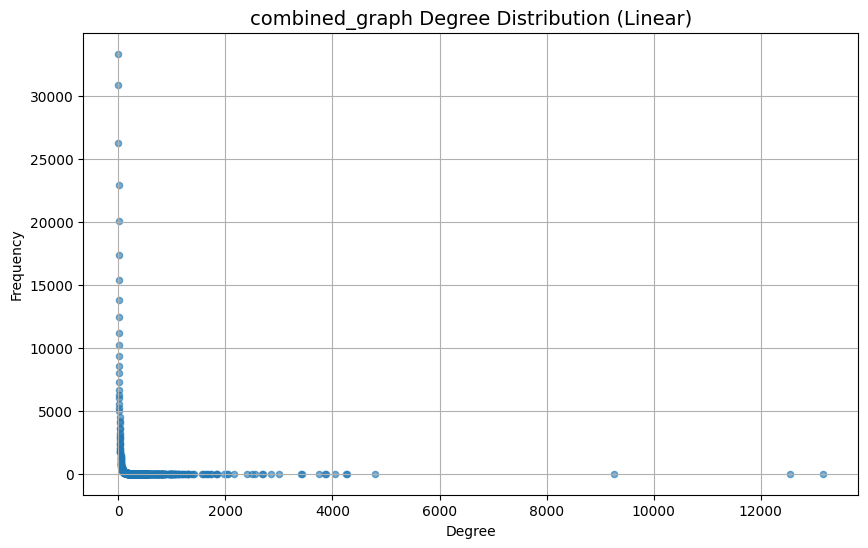

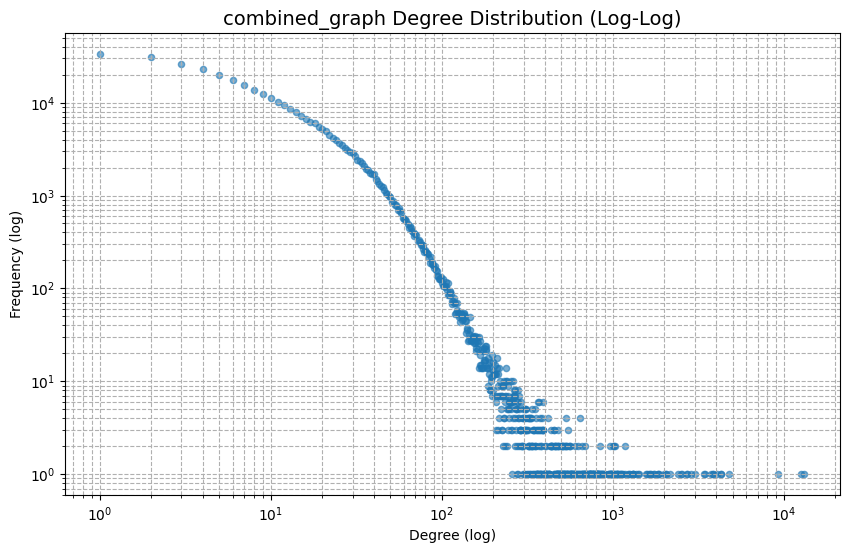

116310


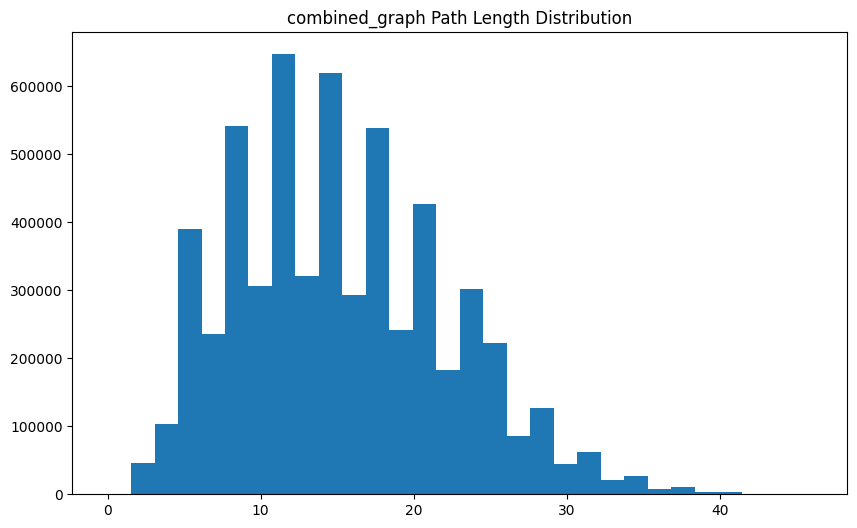

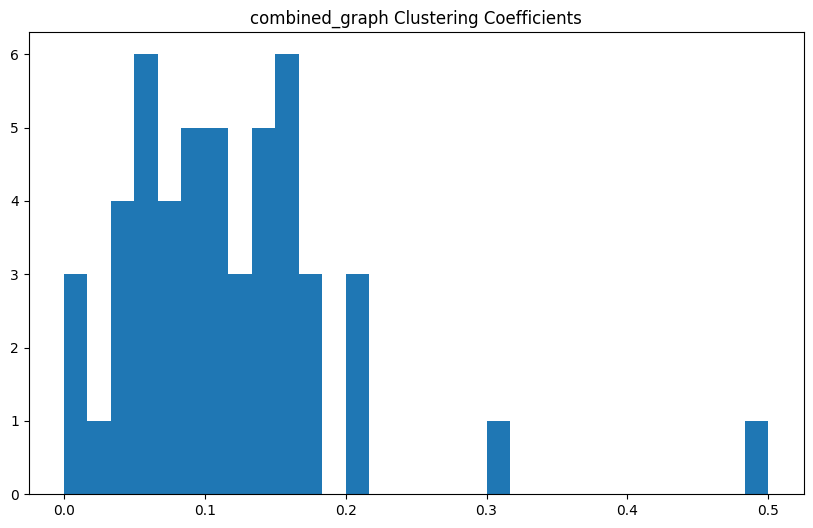

In [ ]:
import dgl
#转换成network之后可以计算graph的特征并绘图
graph_nx = dgl.to_networkx(graph, edge_attrs=None, node_attrs=None)
combined_graph_metrics = analyze_network(graph_nx, "combined_graph")


In [ ]:
print(combined_graph_metrics)

{'num_nodes': 369343, 'num_edges': 3230915, 'avg_in_degree': np.float64(8.747735844458944), 'avg_out_degree': np.float64(8.747735844458944), 'density': 2.3684649578057585e-05, 'gc_nodes': 116310, 'avg_path_length': np.float64(15.254291290516722), 'avg_clustering': np.float64(0.11511128255076708)}


In [ ]:
print("开始在完整图上训练...")
print(graph)

train_graphsage(graph, feat_name = "ga_embedding",hidden_feats = 512, num_layers=3,
    dropout=0.3, lr=0.001, epochs=100, batch_size=512, folder_path="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model/graph_ga_embedding"
)
train_graphsage(graph, feat_name = "feat", hidden_feats = 512,num_layers=3,
    dropout=0.3, lr=0.001, epochs=100, batch_size=512, folder_path="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model/graph_feat"
)
train_graphsage(graph, feat_name = "e5_feat", hidden_feats = 512, num_layers=3,
    dropout=0.3, lr=0.001, epochs=100, batch_size=512, folder_path="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model/graph_e5_feat"
)

## 6.6 Load the sampled mag graph and train it with 3 embedding

In [ ]:
# 加载压缩图
import gzip
import pickle
def load_graph_compressed(filename):
    # 使用 gzip 解压缩并加载图
    with gzip.open(filename, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {filename}")
    return graph
graph_0 = load_graph_compressed("/content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed_0.pkl.gz")

# 验证加载后的图结构
print("Node data:", graph_0.ndata.keys())
print("Edge data:", graph_0.edata.keys())
print(graph_0)

In [ ]:

# 图分组训练
print("开始训练 graph_source == 0 的子图...")

train_graphsage(graph_0, feat_name = "feat", hidden_feats = 512, num_layers=3,
    dropout=0.3, lr=0.001, epochs=100, batch_size=1024, folder_path="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model/graph_0_feat"
)
train_graphsage(graph_0, feat_name = "e5_feat", hidden_feats = 512,num_layers=3,
    dropout=0.3, lr=0.001, epochs=100, batch_size=1024, folder_path="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model/graph_0_e5_feat"
)
train_graphsage(graph_0, feat_name = "ga_embedding",hidden_feats = 512, num_layers=3,
    dropout=0.3, lr=0.001, epochs=100, batch_size=1024, folder_path="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model/graph_0_ga_embedding"
)


## 6.7 Load the arxiv graph and train it with 3 embedding

In [ ]:
# 加载压缩图
import gzip
import pickle
def load_graph_compressed(filename):
    # 使用 gzip 解压缩并加载图
    with gzip.open(filename, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {filename}")
    return graph
graph_1 = load_graph_compressed("/content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed_1.pkl.gz")

# 验证加载后的图结构
print("Node data:", graph_1.ndata.keys())
print("Edge data:", graph_1.edata.keys())

In [ ]:

print("开始训练 graph_source == 1 的子图...")

train_graphsage(graph_1, feat_name = "feat",hidden_feats = 512, num_layers=3,
    dropout=0.3, lr=0.001, epochs=100, batch_size=1024, folder_path="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model_2/graph_1_feat"
)
train_graphsage(graph_1, feat_name = "e5_feat", hidden_feats = 512,num_layers=3,
    dropout=0.3, lr=0.001, epochs=100, batch_size=1024, folder_path="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model/graph_1_e5_feat"
)
train_graphsage(graph_1, feat_name = "ga_embedding",hidden_feats = 512, num_layers=3,
    dropout=0.3, lr=0.001, epochs=100, batch_size=1024, folder_path="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model/graph_1_ga_embedding"
)

## 6.8 Get the metics(train accuracy, test accuracy, validation accuracy) we need.

In [ ]:
import os
import pandas as pd

# 设定主文件夹路径
base_dir = "/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model"

# 创建一个列表存储结果
results = []

# 遍历每个子文件夹
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "training_results.txt")

    # 确保它是一个文件夹并且文件存在
    if os.path.isdir(folder_path) and os.path.exists(file_path):
        # 读取数据
        df = pd.read_csv(file_path, sep="\t")

        # 删除非数值行
        df = df.apply(pd.to_numeric, errors='coerce').dropna()

        # 找到 ValidAcc 最高的一行
        best_row = df.loc[df["ValidAcc"].idxmax()]


        # 存储结果
        results.append({
            "Folder": folder,
            "Best Val Epoch": int(best_row["Epoch"]),
            "Best_Val_Accuracy": best_row["ValidAcc"],
            "Train_Accuracy": best_row["TrainAcc"],
            "Test_Accuracy": best_row["TestAcc"],
            "Loss": best_row["Loss"]
        })

# 转换为 DataFrame
final_df = pd.DataFrame(results)

print(final_df)

import os
import pandas as pd

# 设定主文件夹路径
base_dir = "/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model"

# 创建一个列表存储结果
results = []

# 遍历每个子文件夹
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "training_results.txt")

    # 确保它是一个文件夹并且文件存在
    if os.path.isdir(folder_path) and os.path.exists(file_path):
        # 读取数据
        df = pd.read_csv(file_path, sep="\t")

        # 删除非数值行
        df = df.apply(pd.to_numeric, errors='coerce').dropna()

        # 找到 ValidAcc 最高的行号
        best_row_index = df["ValidAcc"].idxmax()
        best_row = df.loc[best_row_index]

        # 存储结果
        results.append({
            "Folder": folder,
            "Best Val Epoch Index": best_row_index + 1,  # +1 让索引变成行号（索引是从 0 开始的）
            "Best_Val_Accuracy": best_row["ValidAcc"],
            "Train_Accuracy": best_row["TrainAcc"],
            "Test_Accuracy": best_row["TestAcc"],
            "Loss": best_row["Loss"]
        })

# 转换为 DataFrame
final_df = pd.DataFrame(results)

print(final_df)

# 创建 Graph 字段
df = final_df
df["Graph"] = df["Folder"].apply(lambda x: "Arxiv" if "graph_1" in x else ("MAG" if "graph_0" in x else "Joined"))

# 创建 Feature 字段
df["Feature"] = df["Folder"].apply(lambda x:
    "Original" if "feat" in x and "e5" not in x and "ga" not in x else
    "E5 Embedding" if "e5" in x else
    "Graph Align Embedding" if "ga" in x else "Unknown"
)

# 删除原始 Folder 字段
df.drop(columns=["Folder"], inplace=True)

print(df)


                 Folder  Best Val Epoch  Best_Val_Accuracy  Train_Accuracy  \
0          graph_0_feat              14             0.3038          0.2403   
1            graph_feat              13             0.3851          0.3322   
2         graph_e5_feat              19             0.2588          0.2661   
3    graph_ga_embedding               6             0.1919          0.1930   
4          graph_1_feat              15             0.5717          0.5821   
5       graph_0_e5_feat               1             0.2985          0.2465   
6  graph_0_ga_embedding               7             0.2792          0.2322   
7       graph_1_e5_feat               3             0.5015          0.5386   
8  graph_1_ga_embedding              10             0.1805          0.2979   

   Test_Accuracy    Loss  
0         0.3430  2.8037  
1         0.4477  2.3681  
2         0.1678  2.4279  
3         0.1448  2.2438  
4         0.5418  1.4105  
5         0.3114  2.6339  
6         0.2789  2.5286  
7  

In [ ]:
# 加载压缩图
import gzip
import pickle
def load_graph_compressed(filename):
    # 使用 gzip 解压缩并加载图
    with gzip.open(filename, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {filename}")
    return graph
# 使用示例
graph_dict = {
    'graph': load_graph_compressed("/content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed.pkl.gz"),  # 替换为实际加载方式
    'graph_0': load_graph_compressed("/content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed_0.pkl.gz"),
    'graph_1': load_graph_compressed("/content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed_1.pkl.gz")
}

Graph loaded from /content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed.pkl.gz
Graph loaded from /content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed_0.pkl.gz
Graph loaded from /content/drive/MyDrive/ColabNotebooks/socialScienceProject/combined_graph_with3embedding_processed_1.pkl.gz


In [ ]:
import os
import torch
import pandas as pd
from sklearn.metrics import f1_score
import os
import torch
import torch.nn.functional as F
import dgl
from dgl.nn import SAGEConv
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, recall_score
def calculate_f1_scores(graph_dict, model_root_dir, dropout=0.3, batch_size=1024):
    """
    优化内存版本的特征评估函数
    新增参数:
        batch_size (int): 测试时的批处理大小
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    results = []

    # 预定义参数
    HIDDEN_DIM = 512
    NUM_LAYERS = 3
    OUT_DIM = 389
    VALID_FEATS = {'e5_feat', 'feat', 'ga_embedding'}
    GRAPH_NAMES = ['graph_1', 'graph_0', 'graph']  # 按数字倒序排列避免误匹配

    for folder in os.listdir(model_root_dir):
        # 内存优化1: 尽早释放循环变量
        current_graph = None
        model = None

        folder_path = os.path.join(model_root_dir, folder)
        model_path = os.path.join(folder_path, "best_model.pth")

        if not os.path.isdir(folder_path) or not os.path.exists(model_path):
            continue

        try:
            # 解析图名和特征名
            parsed = False
            for graph_name in GRAPH_NAMES:
                if folder.startswith(graph_name + "_"):
                    feat_name = folder[len(graph_name)+1:]
                    if feat_name in VALID_FEATS:
                        parsed = True
                        break
            if not parsed:
                continue

            # 内存优化2: 按需加载图数据
            current_graph = graph_dict[graph_name].to(device)
            if feat_name not in current_graph.ndata:
                continue

            # 内存优化3: 使用with作用域控制模型生命周期
            with torch.no_grad():
                # 初始化模型
                in_dim = current_graph.ndata[feat_name].shape[1]
                model = GraphSAGE(in_dim, HIDDEN_DIM, OUT_DIM, NUM_LAYERS, dropout).to(device)
                model.load_state_dict(torch.load(model_path, map_location=device))
                model.eval()

                # 准备测试数据
                test_mask = current_graph.ndata['test_mask']
                test_idx = torch.nonzero(test_mask, as_tuple=True)[0]
                labels = current_graph.ndata['label'].argmax(dim=1).cpu()

                # 内存优化4: 分批次推理
                all_preds = []
                for i in range(0, len(test_idx), batch_size):
                    batch_idx = test_idx[i:i+batch_size]

                    # 内存优化5: 使用子图减少数据量
                    subg = dgl.node_subgraph(current_graph, batch_idx)
                    batch_feats = subg.ndata[feat_name]

                    logits = model(subg, batch_feats)
                    batch_preds = logits.argmax(dim=1).cpu()
                    all_preds.append(batch_preds)

                    # 内存优化6: 及时释放中间变量
                    del subg, batch_feats, logits
                    torch.cuda.empty_cache()

                # 计算最终指标
                #final_preds = torch.cat(all_preds)
                #f1 = f1_score(labels[test_idx.cpu()], final_preds, average='macro')
                #results.append({"folderName": folder, "f1": round(f1, 4)})
                            # 计算指标
                final_preds = torch.cat(all_preds)
                y_true = labels[test_idx.cpu()]

                results.append({
                    "folderName": folder,
                    "f1": round(f1_score(y_true, final_preds, average='macro'), 4),
                    "accuracy": round(accuracy_score(y_true, final_preds), 4),
                    "recall": round(recall_score(y_true, final_preds, average='macro'), 4)
                })

        except Exception as e:
            print(f"Error in {folder}: {str(e)}")
        finally:
            # 内存优化7: 强制释放资源
            del current_graph, model
            torch.cuda.empty_cache()

    return pd.DataFrame(results)

# 定义 GraphSAGE 模型
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_layers, dropout):
        super(GraphSAGE, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(SAGEConv(in_feats, hidden_feats, aggregator_type='mean'))
        for _ in range(num_layers - 2):
            self.layers.append(SAGEConv(hidden_feats, hidden_feats, aggregator_type='mean'))
        self.layers.append(SAGEConv(hidden_feats, out_feats, aggregator_type='mean'))
        self.dropout = dropout

    def forward(self, g, x):
        for i, layer in enumerate(self.layers):
            x = layer(g, x)
            if i != len(self.layers) - 1:
                x = F.relu(x)
                #print(f"Applying Dropout with p={self.dropout}")
                x = F.dropout(x, p=self.dropout, training=self.training)
        return x

In [ ]:
df = calculate_f1_scores(
    graph_dict=graph_dict,
    model_root_dir="/content/drive/MyDrive/ColabNotebooks/socialScienceProject/Section7_model",
    dropout=0.3
)
print(df)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

             folderName      f1  accuracy  recall
0          graph_0_feat  0.0403    0.3267  0.0571
1            graph_feat  0.0601    0.4267  0.0674
2         graph_e5_feat  0.0350    0.1823  0.0343
3    graph_ga_embedding  0.0415    0.1541  0.0506
4          graph_1_feat  0.3302    0.5436  0.3278
5       graph_0_e5_feat  0.0478    0.3215  0.0623
6  graph_0_ga_embedding  0.0329    0.3013  0.0464
7       graph_1_e5_feat  0.1022    0.1287  0.0832
8  graph_1_ga_embedding  0.0201    0.0860  0.0328
